## Load data

In [1]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


## Data preprocessing

In [2]:
# check for null data
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [3]:
# check for any duplicates
df.duplicated().sum()

0

In [4]:
# create copy of dataframe
df_copy = df.copy()

In [5]:
# convert class column to string labels
""" 
    0: Hate speech
    1: Offensive language
    2: Neither
"""
def class_convert(text):
    if text == 0:
        return "Hate speech"
    elif (text == 1):
        return "Offensive language"
    else:
        return "Neither"
df['class'] = df['class'].apply(class_convert)

## Exploratory data analysis


<Axes: xlabel='class'>

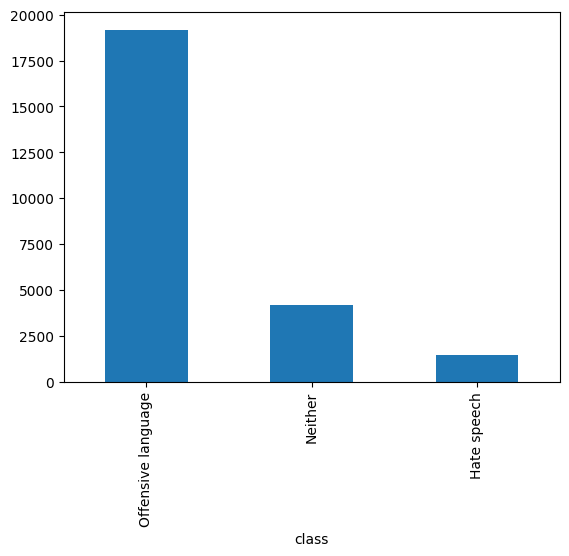

In [6]:
df['class'].value_counts().plot(kind='bar')

<Axes: xlabel='hate_speech_count'>

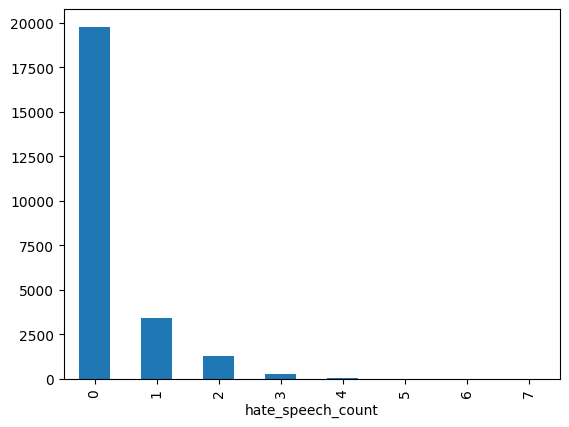

In [7]:
df['hate_speech_count'].value_counts().plot(kind='bar')

<Axes: xlabel='offensive_language_count'>

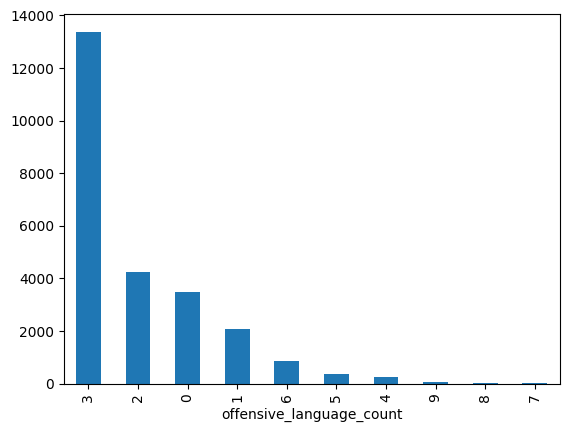

In [8]:
df['offensive_language_count'].value_counts().plot(kind='bar')

<Axes: xlabel='neither_count'>

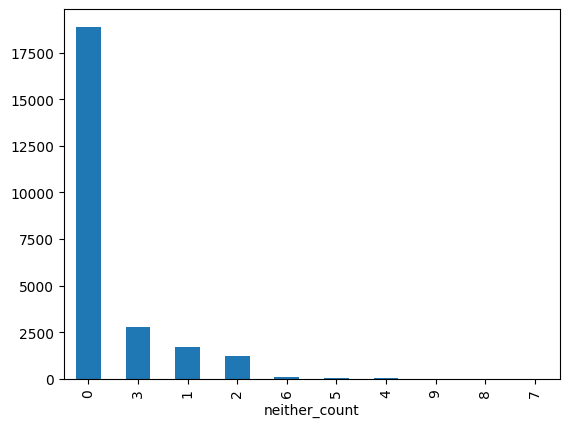

In [9]:
df['neither_count'].value_counts().plot(kind='bar')

## Text preprocessing

In [10]:
# identify abnormal strings
import re
abnormal = df['tweet'].loc[df['tweet'].str.contains(r"http|https|@|\S")]
abnormal

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [11]:
# create function to clean tweets
def text_preprocessing_text1(text):
    pattern = r"(@|#)[a-zA-Z]*[^\s]*|https://[a-zA-Z]*[^\s]*|http://[a-zA-Z]*[^\s]*|[^a-zA-Z]|RT"
    result = re.sub(pattern," ",text)
    return result

In [12]:
# create function to lemmatize tweets
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def text_preprocessing_text2(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    lemmatized_tokens = [lemmatizer.lemmatize(cleaned_tokens) for cleaned_tokens in filtered_tokens]
    result = " ".join(lemmatized_tokens)
    return result

In [13]:
# apply text_preprocessing_text1 function
df['tweet'] = df['tweet'].apply(text_preprocessing_text1)
df['tweet'].head()

0            As a woman you shouldn t complain abou...
1              boy dats cold   tyga dwn bad for cuf...
2                Dawg         You ever fuck a bitch...
3                               she look like a tranny
4                      The shit you hear about me m...
Name: tweet, dtype: object

In [14]:
# apply text_preprocessing_text2 function
df['tweet'] = df['tweet'].apply(text_preprocessing_text2)
df['tweet'].head()

0    woman complain cleaning house amp man always t...
1    boy dat cold tyga dwn bad cuffin dat hoe st place
2         Dawg ever fuck bitch start cry confused shit
3                                     look like tranny
4       shit hear might true might faker bitch told ya
Name: tweet, dtype: object

## Build ML models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['tweet']
y = df['class']
train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=1)
vectorizer = TfidfVectorizer()
train_X_vec = vectorizer.fit_transform(train_X)
test_X_vec = vectorizer.transform(test_X)

In [16]:
# Build SVM model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(train_X_vec,train_y)

SVC()

In [17]:
# Build KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(train_X_vec,train_y)

KNeighborsClassifier()

In [18]:
# Build multinomial naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_X_vec,train_y)

MultinomialNB()

In [19]:
# generate predictions
svm_pred = svm_model.predict(test_X_vec)
knn_pred = knn_model.predict(test_X_vec)
nb_pred = nb_model.predict(test_X_vec)

In [25]:
# generate precision scores
from sklearn.metrics import precision_score
svm_pre = precision_score(test_y,svm_pred,average='micro')
knn_pre = precision_score(test_y,knn_pred,average='micro')
nb_pre = precision_score(test_y,nb_pred,average='micro')
print(f"Precision scores\nSVM model: {round(svm_pre,3)}\nKNN model: {round(knn_pre,3)}\nNB model: {round(nb_pre,3)}")

Precision score
SVM model: 0.897
KNN model: 0.789
NB model: 0.805


In [37]:
# generate precision score for each labels
labels = df['class'].unique()
print(labels)
svm_label_score = precision_score(test_y,svm_pred,labels = labels,average=None)
knn_label_score = precision_score(test_y,knn_pred,labels=labels,average=None)
nb_label_score = precision_score(test_y,nb_pred,labels=labels,average=None)
print("Precision score for each labels (SVM, KNN, NB)")
for i in range(len(labels)):
    print(f"{labels[i]}: {round(svm_label_score[i],3)}, {round(knn_label_score[i],3)}, {round(nb_label_score[i],3)}")

['Neither' 'Offensive language' 'Hate speech']
Precision score for each labels (SVM, KNN, NB)
Neither: 0.826, 0.697, 0.928
Offensive language: 0.917, 0.793, 0.801
Hate speech: 0.5, 0.556, 0.0


C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
# tuned SVM 
params = {'C':(1,2),'kernel':('linear','rbf')}
svm = SVC()
tuned_svm = RandomizedSearchCV(svm,params,cv=3)
tuned_svm.fit(train_X_vec,train_y)

C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': (1, 2),
                                        'kernel': ('linear', 'rbf')})

In [47]:
# tuned KNN
params = {'n_neighbors':(2,4,6,8),'weights':('uniform','distance'),'algorithm':('auto','ball_tree')}
knn = KNeighborsClassifier()
tuned_knn = RandomizedSearchCV(knn,params,cv=3)
tuned_knn.fit(train_X_vec,train_y)

C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree'),
                                        'n_neighbors': (2, 4, 6, 8),
                                        'weights': ('uniform', 'distance')})

In [44]:
# tuned NB
params = {'alpha':(1,2,4),'force_alpha':(True,False),'fit_prior':(True,False)}
nb = MultinomialNB()
tuned_nb = RandomizedSearchCV(nb, params,cv=3)
tuned_nb.fit(train_X_vec,train_y)

RandomizedSearchCV(cv=3, estimator=MultinomialNB(),
                   param_distributions={'alpha': (1, 2, 4),
                                        'fit_prior': (True, False),
                                        'force_alpha': (True, False)})

In [48]:
# predictions of tuned models
tuned_svm_pred = tuned_svm.predict(test_X_vec)
tuned_knn_pred = tuned_knn.predict(test_X_vec)
tuned_nb_pred = tuned_nb.predict(test_X_vec)

In [49]:
# precision scores of tuned models
tuned_svm_pre = precision_score(test_y,tuned_svm_pred,average='micro')
tuned_knn_pre = precision_score(test_y,tuned_knn_pred,average='micro')
tuned_nb_pre = precision_score(test_y,tuned_nb_pred,average='micro')
print(f"Precision scores\nTuned SVM: {round(tuned_svm_pre,3)}\nTuned KNN: {round(tuned_knn_pre,3)}\nTuned NB: {round(tuned_nb_pre,3)}")

Precision scores
Tuned SVM: 0.901
Tuned KNN: 0.792
Tuned NB: 0.852


In [50]:
# find specified parameters of tuned SVM model
tuned_svm.best_params_

{'kernel': 'linear', 'C': 1}